In [1]:
%%HTML
<script src="require.js"></script>

# AI&ML PROJECT - Summer 2023 #
***Students  :***

    -Ahmad Khalil Fratekh - 0206882 
    -Noor Mohammad Albaw - 0201672
    -Ibrahim Bilal Saleem - 0209537

## Project Overview :
***The project involves working on a dataset of medical students, working on the dataset we went through multiple operations, which include :***

    1-Data preparation
    2-Classification using sklearn
    3-Classification using neural networks from keras
**About Dataset**

### Medical Student Dataset:

***The Medical Student Dataset is a simulated dataset containing 200,000 rows and 13 columns.***

### Columns Description:

    1- StudentID: Unique identifier for each medical student
    2- Gender: Gender of the student (i.e., Male, Female).
    3- Age: The age of each student in years.
    4- Height: Height for students in m
    5- Weight: Weight for students in KG
    6- Blood Type : students blood type having values ( A , B , AB , O)
    7- BMI : The body mass index for each student represented with the formula : BMI = Weight(Kg)/(Height(m))^2
    8- Smoking : having values of Yes or No
    9- Diabetes: having values of Yes or No
    10-Temperature: Body temperature of each student
    11- Heart Rate : Heart Rate of the students ( float values )
    12- Blood Pressure: Blood Pressure of the students ( float values )
    13- Cholesterol: The amount of cholesterol in each student's body ( float values )

### The dataset contains :
    -Missing values: Some columns may have missing values represented as NaN.
    -Duplicates: Duplicate records may exist in the dataset, representing some/all identical students entries.
    -Inconsistencies: The dataset may contain inconsistent or erroneous values in certain columns.
    
***and we have set our target to be the "Diabetes" column***
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from scipy import stats
import os
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import joblib
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import tensorflow as tf
import keras
from keras import layers
import shutil
from tensorflow.keras import initializers
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook+pdf'

## *PART 1*

***Data Preparation :*** 


In [3]:
data = pd.read_csv('medical_students_dataset.csv')
data.shape

(200000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [5]:
data.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

### ***Since, as we can see from the plot below, the data is not balanced, we started off by extracting a balanced data to work on***

<Axes: title={'center': 'Diabetes'}, xlabel='count', ylabel='Diabetes'>

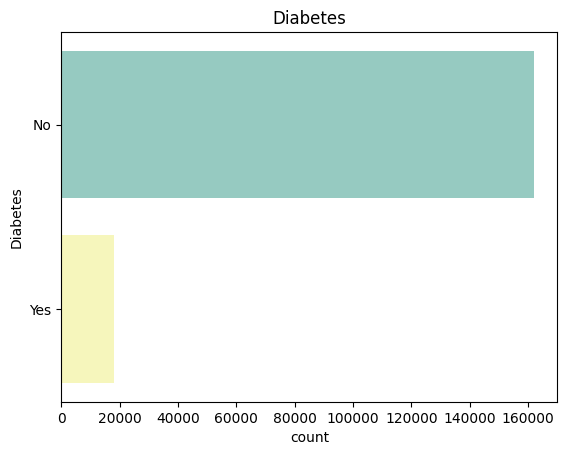

In [6]:
plt.gca().set_title("Diabetes")
sns.countplot(y="Diabetes" , palette='Set3', data = data)

### ***The following three cells of code, implement and visualize the procedure of extracting our balanced dataset :***

In [7]:
data_yes = data[data["Diabetes"]=="Yes"]
data_no = data[data["Diabetes"]=="No"]

pd.DataFrame(data_yes)
pd.DataFrame(data_no)

Med_Stu=pd.concat([data_yes[:18000],data_no[:18000]], ignore_index=True)
Med_Stu["Diabetes"]

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
35995     No
35996     No
35997     No
35998     No
35999     No
Name: Diabetes, Length: 36000, dtype: object

In [8]:
print(Med_Stu.shape)

Med_Stu.info()

(36000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      32406 non-null  float64
 1   Age             32444 non-null  float64
 2   Gender          32354 non-null  object 
 3   Height          32393 non-null  float64
 4   Weight          32346 non-null  float64
 5   Blood Type      32431 non-null  object 
 6   BMI             32382 non-null  float64
 7   Temperature     32414 non-null  float64
 8   Heart Rate      32447 non-null  float64
 9   Blood Pressure  32419 non-null  float64
 10  Cholesterol     32404 non-null  float64
 11  Diabetes        36000 non-null  object 
 12  Smoking         32311 non-null  object 
dtypes: float64(9), object(4)
memory usage: 3.6+ MB


<Axes: title={'center': 'Diabetes'}, xlabel='count', ylabel='Diabetes'>

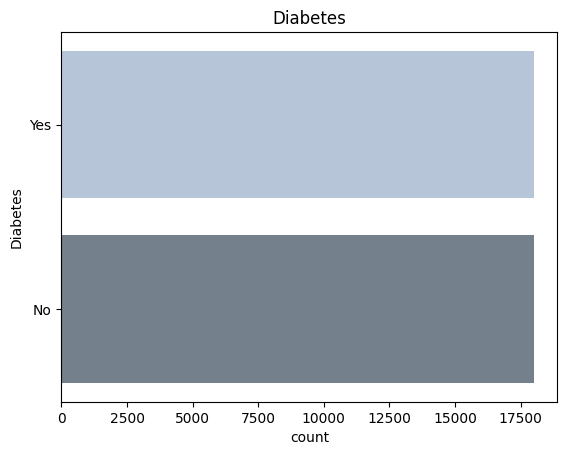

In [9]:
plt.gca().set_title("Diabetes")
sns.countplot(y="Diabetes" , palette=['lightsteelblue','slategrey'], data = Med_Stu)


### **Now that we have extracted our balanced data, it's time to get rid of unnecessary or full of null values column(s), which (is/are) : "Student ID"**

In [10]:
Med_Stu_0= Med_Stu.drop("Student ID", axis=1,inplace=True)

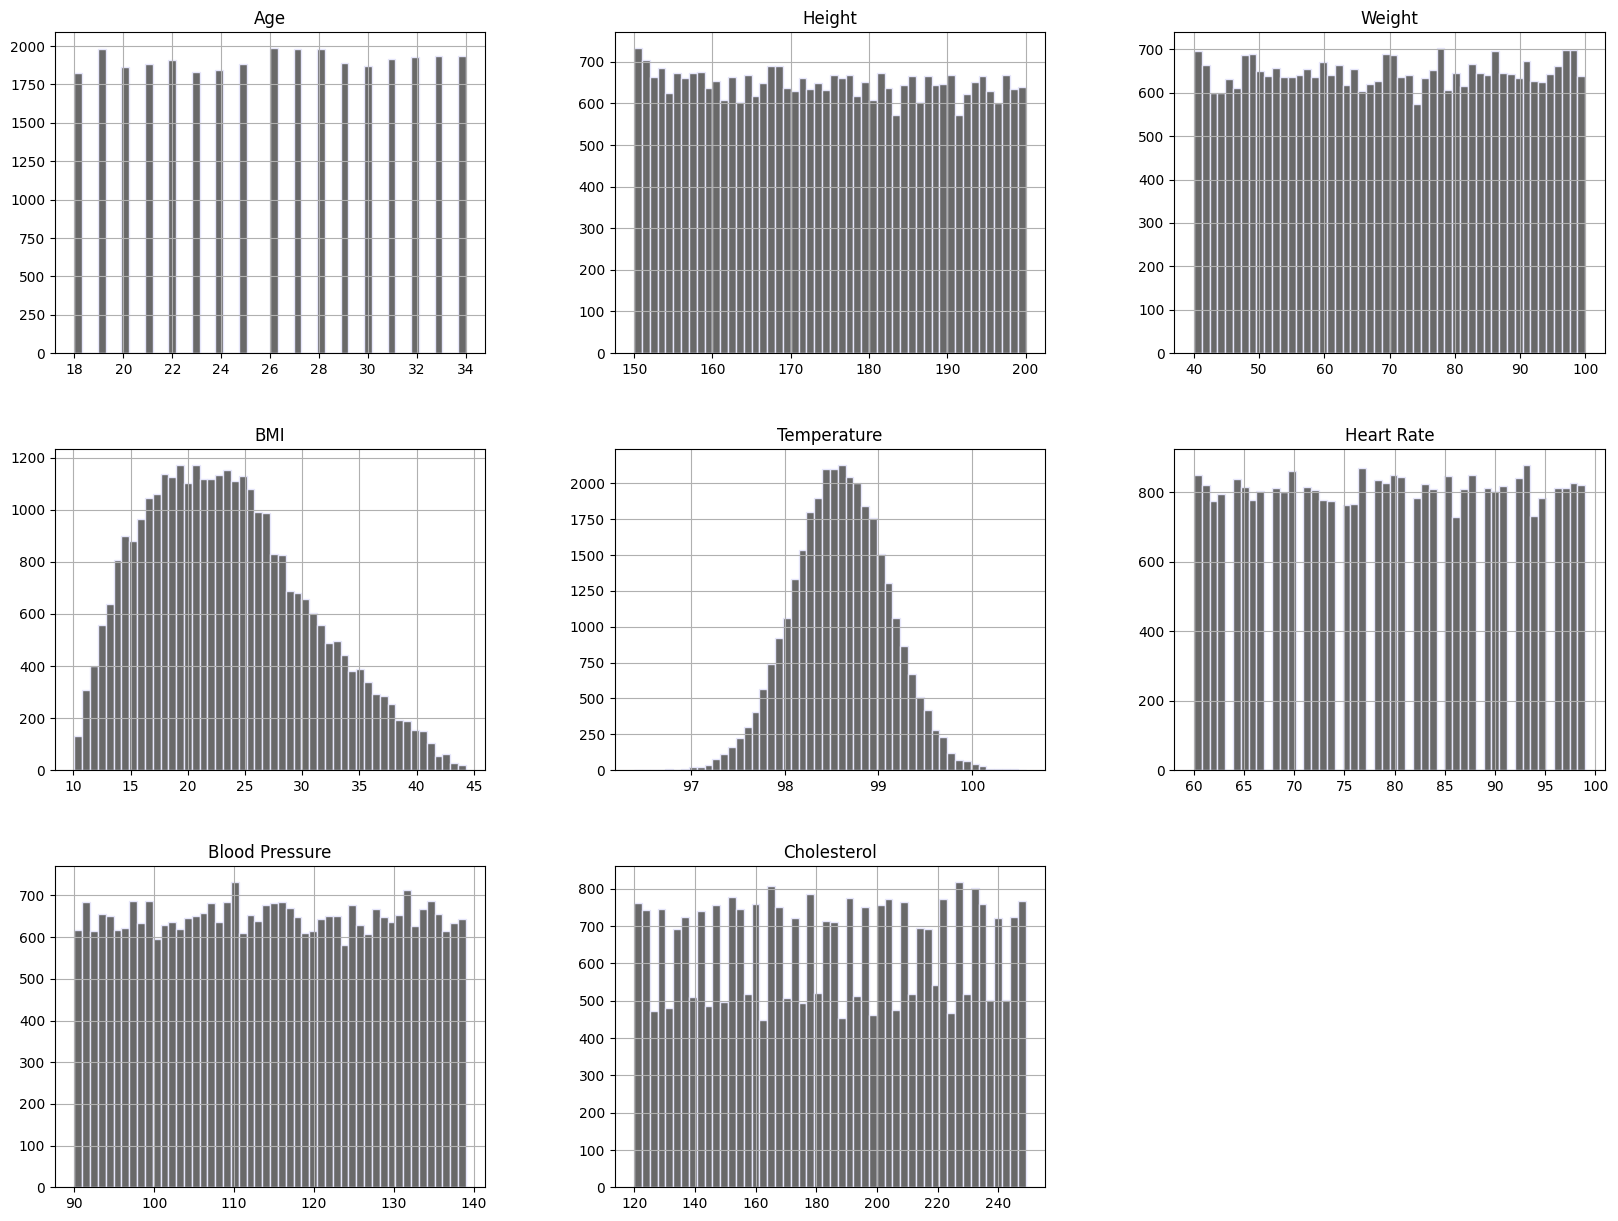

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,32444.000000,32393.000000,32346.000000,32382.000000,32414.000000,32447.000000,32419.000000,32404.000000
mean,26.043983,174.730780,70.088455,23.392699,98.596852,79.516627,114.530337,184.759844
std,4.894372,14.493838,17.377104,7.093494,0.502917,11.546663,14.398554,37.517835
min,18.000000,150.000996,40.000578,10.081431,96.397835,60.000000,90.000000,120.000000
25%,22.000000,162.149046,55.009155,17.865348,98.260639,70.000000,102.000000,152.000000
50%,26.000000,174.673148,70.082653,22.733757,98.595614,80.000000,114.000000,185.000000
75%,30.000000,187.302386,85.194960,28.084662,98.939748,90.000000,127.000000,218.000000
max,34.000000,199.997940,99.997668,44.314074,100.566498,99.000000,139.000000,249.000000


In [11]:
Med_Stu.hist(bins=50, figsize=(20,15), color='dimgray', ec='lavender')
plt.show()

Med_Stu.describe()

 ***In the cell below, we can notice that, there's a couple of missing values in all of the features except for the label which raises the need of using an imputer***

In [12]:
Med_Stu.isnull().sum()

Age               3556
Gender            3646
Height            3607
Weight            3654
Blood Type        3569
BMI               3618
Temperature       3586
Heart Rate        3553
Blood Pressure    3581
Cholesterol       3596
Diabetes             0
Smoking           3689
dtype: int64

### ***Before getting to the pipeline, we have to seperate the label from other features, afterwards we have to seperate numercial features from the categorical ones, which is implied in the folloing two cells of code***

In [13]:
Med_Stu_1= Med_Stu.drop("Diabetes", axis=1)
Med_Stu_label = Med_Stu["Diabetes"].copy()
Med_Stu_1.head(10)

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Smoking
0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,No
1,34.0,Male,NaN,60.882228,B,22.544095,98.963569,89.0,130.0,243.0,NaN
2,33.0,Male,184.718988,93.666944,NaN,27.451322,98.418213,68.0,133.0,180.0,Yes
3,33.0,Male,177.165911,68.129149,O,21.705642,98.201649,NaN,116.0,143.0,Yes
4,33.0,Male,160.463706,55.755226,A,21.653691,99.161461,77.0,NaN,152.0,Yes
5,34.0,Male,174.207898,NaN,B,22.292974,98.919826,74.0,129.0,139.0,Yes
6,24.0,Female,162.044348,80.638530,AB,30.709647,98.996462,98.0,137.0,205.0,Yes
7,21.0,Male,171.146689,69.056734,AB,23.575941,98.316070,NaN,93.0,134.0,No
8,34.0,Female,150.942632,90.580214,O,39.756624,97.563234,79.0,135.0,198.0,No
9,21.0,Male,159.633475,89.877838,AB,35.269937,98.592047,71.0,115.0,137.0,No


In [14]:
Med_Stu_Cat = Med_Stu_1.select_dtypes(include="object").columns
Med_Stu_Num = Med_Stu_1.select_dtypes(exclude="object").columns

### The pipeline:

**After separating the features from the response: -The cell below shows 2 pipelines that are created, after dividing the dataset into two categories, the first one contains the numeric features, where the second one contains the categorical features.**

    -The first pipeline, (i.e. "NUM_PIPELINE"), is used to, first, fill the missing values of the numerical features, and then scale the numeric features, to make them easier to compare and to operate on them.

    -The second one , (i.e. "CAT_PIPELINE"), is used, first, fill the missing values of the categorical features, and then encode the categorical features using the one-hot encoder, so that we can find the correlation between the label (i.e. "Heart_Disease") and the other non-numeric features in the dataset.

    -The last pipeline (i.e. "full_pipeline"), basically, combines the first two together.

In [15]:
NUM_PIPLINE= Pipeline([('num_imp', SimpleImputer(strategy ="median")), ('std_scaler', StandardScaler())])

CAT_PIPLINE= Pipeline([('cat_imp',SimpleImputer(strategy='most_frequent')), ('1_hot_encoder',OneHotEncoder(sparse=False))])
                        
                       
                       
full_pipeline = ColumnTransformer([
        ("num",NUM_PIPLINE, Med_Stu_Num),
        ("cat", CAT_PIPLINE,Med_Stu_Cat),
    ],remainder='passthrough')

med_stu = full_pipeline.fit_transform(Med_Stu_1)

Med_Stu_Prepared=pd.DataFrame(med_stu,columns=full_pipeline.get_feature_names_out())
print(Med_Stu_Prepared.shape)
Med_Stu_Prepared.head()

(36000, 16)


c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,num__Age,num__Height,num__Weight,num__BMI,num__Temperature,num__Heart Rate,num__Blood Pressure,num__Cholesterol,cat__Gender_Female,cat__Gender_Male,cat__Blood Type_A,cat__Blood Type_AB,cat__Blood Type_B,cat__Blood Type_O,cat__Smoking_No,cat__Smoking_Yes
0,1.282817,0.568260,-0.871013,-0.980244,-0.705013,-0.325128,1.135976,0.877000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.713266,-0.003772,-0.558887,-0.116245,0.768728,0.860695,1.135976,1.635549,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.498041,0.726921,1.431519,0.612866,-0.374085,-1.054866,1.355525,-0.134399,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.498041,0.177541,-0.118916,-0.240822,-0.827904,0.039740,0.111415,-1.173892,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.498041,-1.037308,-0.870155,-0.248541,1.183418,-0.233911,-0.034951,-0.921043,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


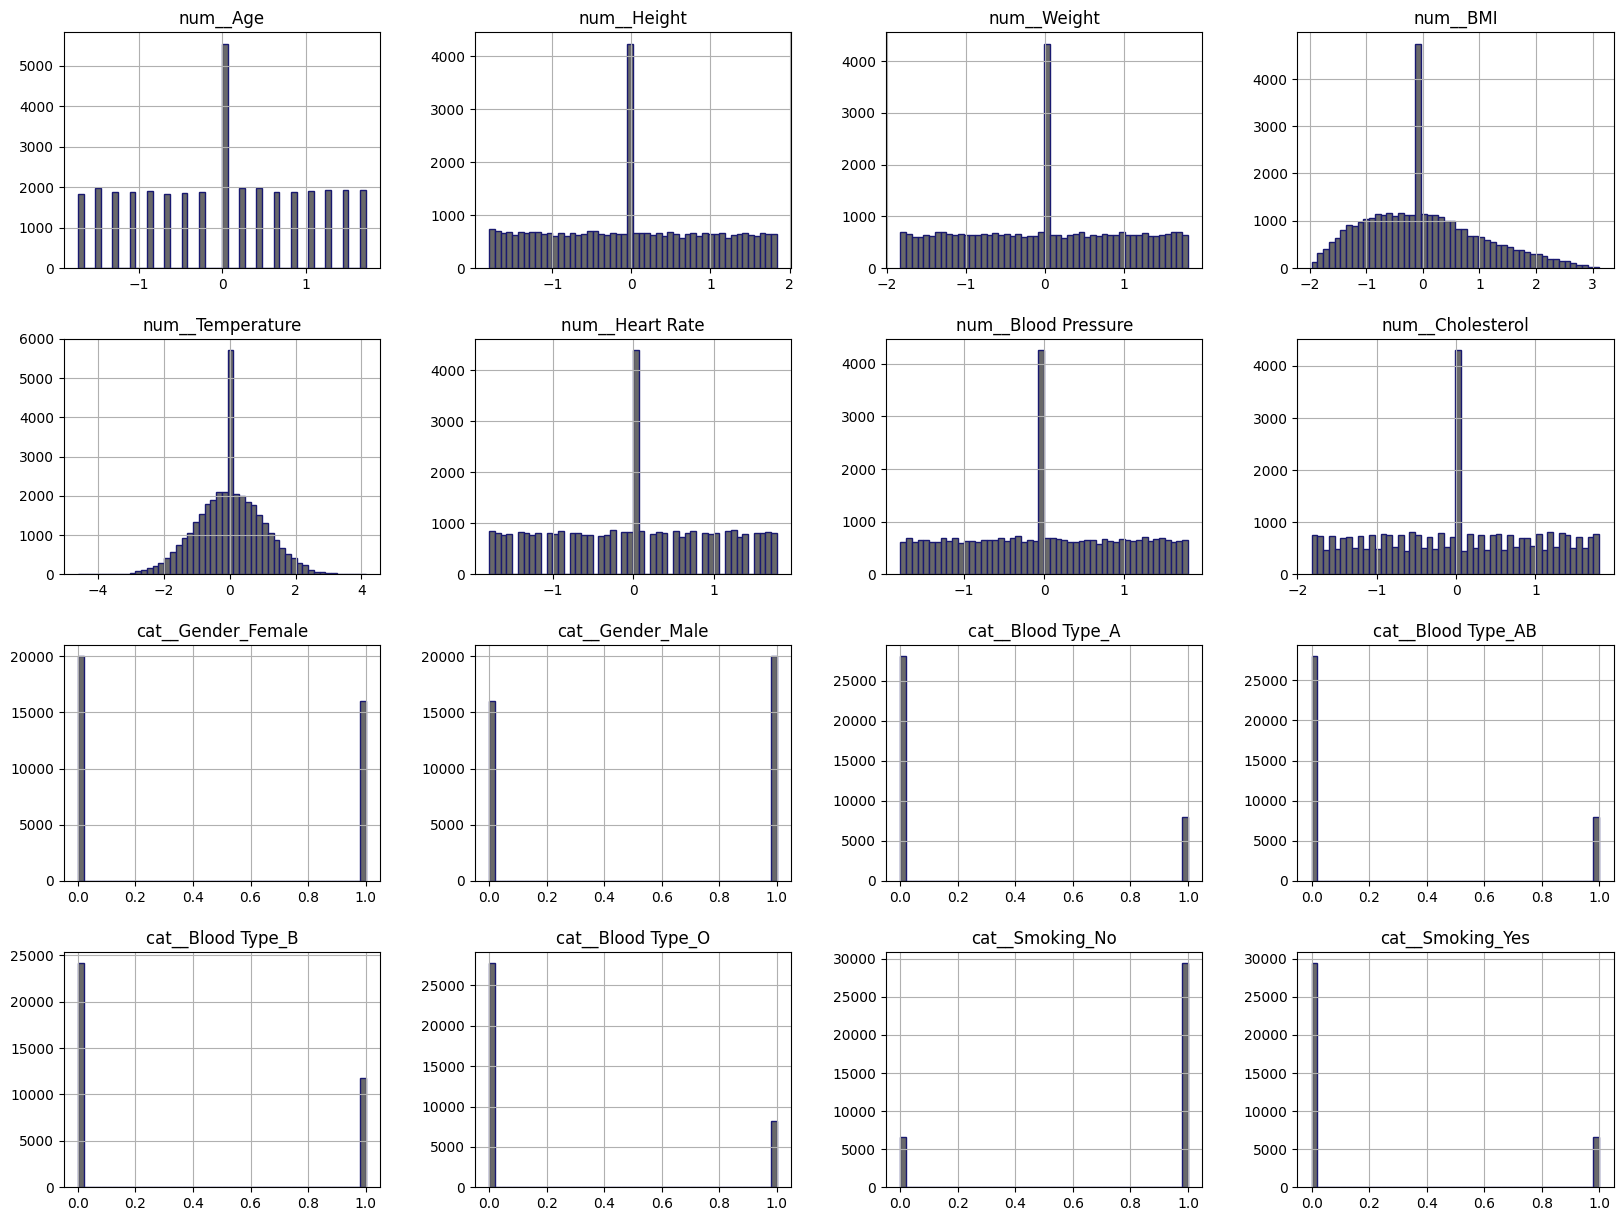

,num__Age,num__Height,num__Weight,num__BMI,num__Temperature,num__Heart Rate,num__Blood Pressure,num__Cholesterol,cat__Gender_Female,cat__Gender_Male,cat__Blood Type_A,cat__Blood Type_AB,cat__Blood Type_B,cat__Blood Type_O,cat__Smoking_No,cat__Smoking_Yes
count,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,3.600000e+04,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,2.084752e-16,3.042505e-16,9.456140e-16,2.456800e-16,-2.901393e-14,-3.720481e-16,3.720481e-16,3.821141e-16,0.444472,0.555528,0.221556,0.222750,0.328278,0.227417,0.818444,0.181556
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.496914,0.496914,0.415299,0.416098,0.469593,0.419170,0.385483,0.385483
min,-1.730328e+00,-1.798322e+00,-1.826641e+00,-1.967937e+00,-4.607862e+00,-1.784603e+00,-1.791342e+00,-1.820064e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.694298e-01,-8.102296e-01,-8.100104e-01,-7.342704e-01,-6.183490e-01,-7.812143e-01,-7.667805e-01,-8.086649e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-8.531266e-03,-3.771884e-03,-3.164960e-04,-8.806557e-02,-2.335110e-03,3.974028e-02,-3.495096e-02,6.073076e-03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.523673e-01,8.092148e-01,8.156271e-01,5.953376e-01,6.297012e-01,7.694777e-01,8.432445e-01,8.208111e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.713266e+00,1.838249e+00,1.815866e+00,3.118318e+00,4.127724e+00,1.772867e+00,1.794623e+00,1.804116e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Med_Stu_Prepared.hist(bins=50, figsize=(20,15), color='dimgray', ec='midnightblue')
plt.show()

Med_Stu_Prepared.describe()

***The cell below shows the re-appending of the label to the dataset after it is prepared***

In [17]:
Med_Stu_Prepared["Diabetes"] = Med_Stu_label
Med_Stu_Prepared.shape

(36000, 17)

***Encoding of the label using the label encoder***

In [18]:
label_encoder = preprocessing.LabelEncoder()
Med_Stu_Prepared["Diabetes"]= label_encoder.fit_transform(Med_Stu_Prepared["Diabetes"])
  
Med_Stu_Prepared=shuffle(Med_Stu_Prepared)
Med_Stu_Prepared.head()

,num__Age,num__Height,num__Weight,num__BMI,num__Temperature,num__Heart Rate,num__Blood Pressure,num__Cholesterol,cat__Gender_Female,cat__Gender_Male,cat__Blood Type_A,cat__Blood Type_AB,cat__Blood Type_B,cat__Blood Type_O,cat__Smoking_No,cat__Smoking_Yes,Diabetes
22963,1.282817,-1.359811,1.545329,-0.088066,-1.227168,-1.510952,-0.327683,-0.555815,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
24263,0.637143,1.753571,-1.491610,-1.755141,0.858773,-0.142694,-0.034951,-1.539120,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
5690,-1.515104,0.433227,-1.328827,-1.272106,-0.002335,-0.872431,0.623696,1.466983,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
14545,1.498041,0.774989,1.015650,0.287683,1.091207,-0.507563,1.501891,-0.190588,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
6027,1.067592,-0.003772,-0.000316,-0.503018,0.814139,0.130957,-0.327683,-0.443438,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


***The cell below finds the correlation between the label (i.e. "Diabetes"), and the remaining features in the dataset***


In [19]:
corr_matrix=Med_Stu_Prepared.corr(numeric_only=True)
corr_matrix["Diabetes"].sort_values(ascending=False)

Diabetes               1.000000
num__Age               0.007611
num__Heart Rate        0.005605
cat__Smoking_No        0.004756
cat__Blood Type_B      0.003668
cat__Blood Type_A      0.003612
num__Weight            0.002761
num__Cholesterol       0.001233
cat__Gender_Female     0.000503
num__BMI               0.000398
cat__Gender_Male      -0.000503
num__Blood Pressure   -0.002450
cat__Blood Type_O     -0.003777
cat__Blood Type_AB    -0.003939
cat__Smoking_Yes      -0.004756
num__Height           -0.005167
num__Temperature      -0.010606
Name: Diabetes, dtype: float64

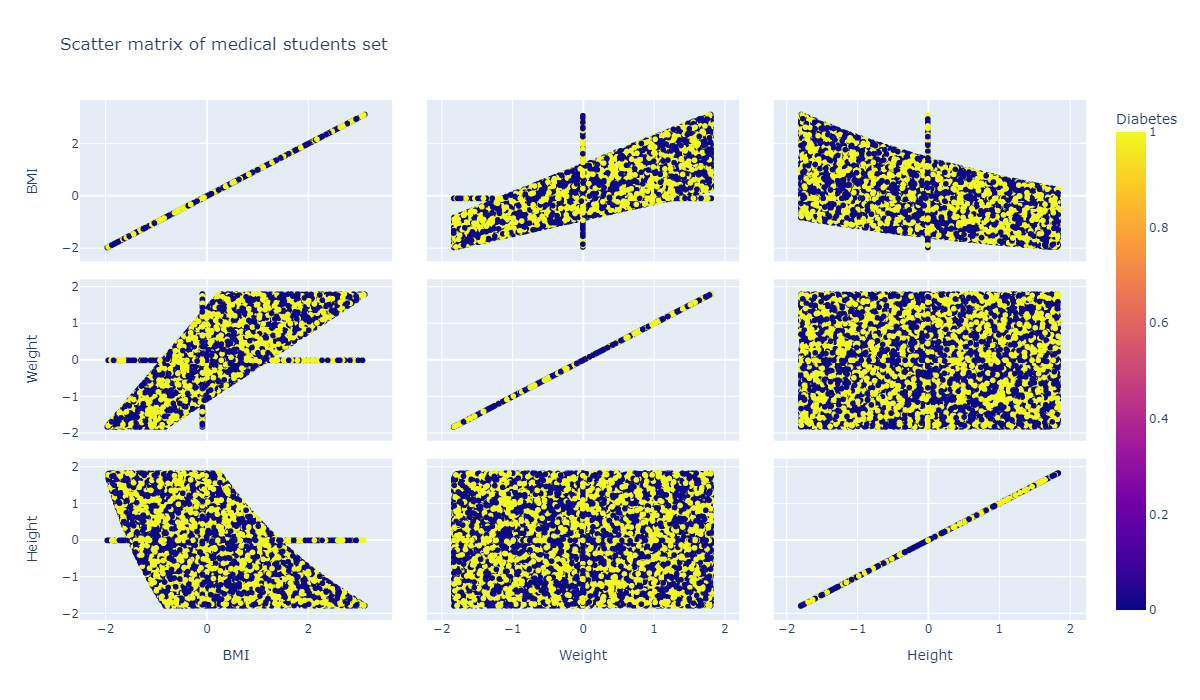

In [20]:
attributes = ["num__BMI", "num__Weight","num__Height"]              
fig = px.scatter_matrix(Med_Stu_Prepared,
    dimensions=attributes,
    color="Diabetes",
    title="Scatter matrix of medical students set",
    labels={col:col.replace('num__', ' ') for col in Med_Stu_Prepared.columns})

image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1)

from IPython.display import Image
Image(image_bytes)


[Text(0.5, 0, 'BMI')]

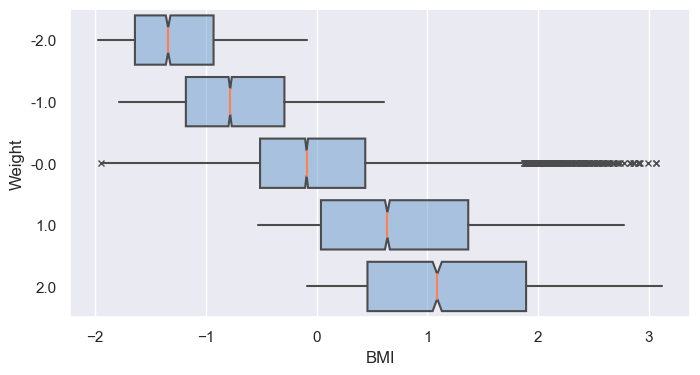

In [21]:
ax=sns.set(rc= {"figure.figsize": (8,4)})

ax=sns.boxplot(
    data=Med_Stu_Prepared, x=Med_Stu_Prepared["num__BMI"].round(2), y=Med_Stu_Prepared["num__Weight"].round(0),
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},orient="h",dodge=True
)

ax.set(ylabel="Weight")
ax.set(xlabel="BMI")



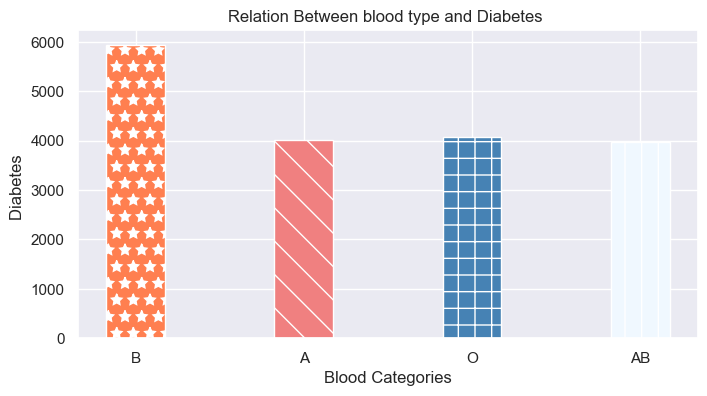

In [22]:
x1=(Med_Stu_Prepared[(Med_Stu_Prepared['Diabetes']==1.0) & (Med_Stu_Prepared['cat__Blood Type_B']==1.0)])
a=x1.shape[0]

x2=(Med_Stu_Prepared[(Med_Stu_Prepared['Diabetes']==1.0) & (Med_Stu_Prepared['cat__Blood Type_A']==1.0)])
b=x2.shape[0]

x3=(Med_Stu_Prepared[(Med_Stu_Prepared['Diabetes']==1.0) & (Med_Stu_Prepared['cat__Blood Type_O']==1.0)])
c=x3.shape[0]

x4=(Med_Stu_Prepared[(Med_Stu_Prepared['Diabetes']==1.0) & (Med_Stu_Prepared['cat__Blood Type_AB']==1.0)])
d=x4.shape[0]



list=[a,b,c,d]
colors=['coral','lightcoral','steelblue','aliceblue']
patterns=('*','\\','+','|')
labels=['B','A','O','AB']

bar=plt.bar(labels,list,label='Blood Type', width=0.35, color=colors)
for i,x in zip(bar,patterns):
    i.set_hatch(x)

plt.ylabel("Diabetes ")
plt.xlabel('Blood Categories')
plt.title('Relation Between blood type and Diabetes ')
plt.show()


### ***The following three cells of code demonstrate the procedure of splitting the data into a training set and a test set with no label***

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Med_Stu_Prepared, Med_Stu_Prepared["Diabetes"]):
    train_set = Med_Stu_Prepared.loc[train_index]
    test_set = Med_Stu_Prepared.loc[test_index]

In [24]:
train = train_set.drop("Diabetes", axis=1) 
l1 = train_set["Diabetes"].copy()
len(l1)


28800

In [25]:
test = test_set.drop("Diabetes", axis=1) 
l2 = test_set["Diabetes"].copy()
test.shape

(7200, 16)

## *PART 2*

***Classifiers used:*** 

    1-DecisionTreeClassifier
    2-LogisticRegression 
    3-SVC
    4-RandomForestClassifier
    5-KNeighborsClassifier
    6-MLPClassifier

***The model is trained and the accuracy is found on and for each one of the classifiers mentioned above*** 

***using the grid search, different parameters are tested for each one of the classifiers***

#### ***1-DecisionTreeClassifier***

In [26]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_params = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
     'splitter': ['best','random'],
     'max_depth': [3,4,5]}]
grid_search = GridSearchCV(tree_clf,tree_params, cv=3,
                           scoring='accuracy')
grid_search.fit(train, l1)
    

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [3, 4, 5],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [27]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for DTC = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Best estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
The accuracy for DTC = 0.5069444444444445
precision = 0.49473684210526314
recall = 0.7271448663853727
f1_score = 0.5888382687927107


***The confusion matrix for:***

    1-training set
    2-testing set

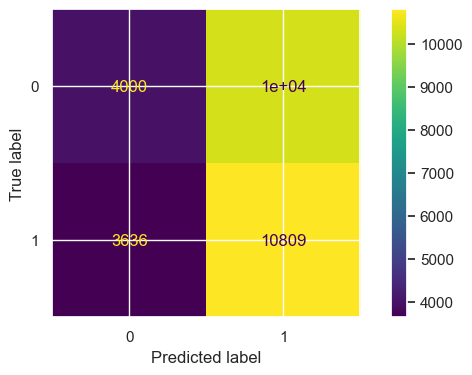

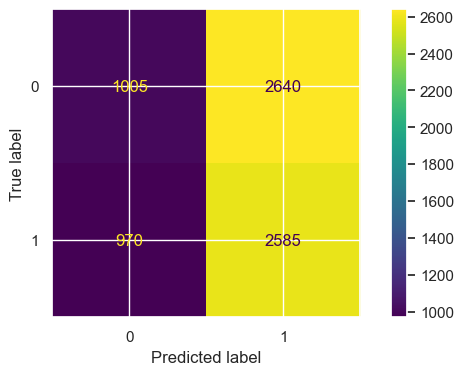

In [28]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***2-LogisticRegression***

In [29]:
log_reg = LogisticRegression(max_iter=1000)
log_params = [
    {'C': [1,10,100],
     'fit_intercept': [True,False],
     'n_jobs': [-1,10,16],
    }]
grid_search = GridSearchCV(log_reg,log_params, cv=3,
                           scoring='accuracy')
grid_search.fit(train, l1)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [1, 10, 100], 'fit_intercept': [True, False],
                          'n_jobs': [-1, 10, 16]}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [30]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for LogisticRegression = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'C': 1, 'fit_intercept': True, 'n_jobs': -1}
Best estimator = LogisticRegression(C=1, max_iter=1000, n_jobs=-1)
The accuracy for LogisticRegression = 0.5032638888888888
precision = 0.4869431643625192
recall = 0.5350210970464135
f1_score = 0.5098512263771613


***The confusion matrix for:***

    1-training set
    2-testing set

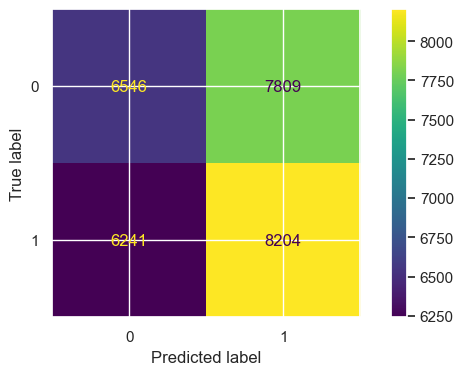

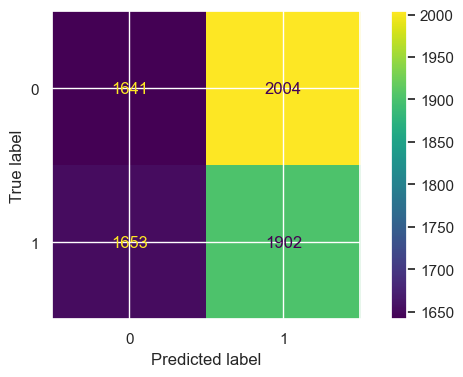

In [31]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***3-SupportVectorClassifier***

In [32]:
svm = SVC()
param_grid = [
    {
     'gamma': [2, 1],
     'C':[0.001,0.1],
    }]

 
grid_search = GridSearchCV(svm, param_grid, cv=3,scoring='accuracy')
grid_search.fit(train[:7000],l1[:7000])


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.1], 'gamma': [2, 1]}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [33]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for SVC = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'C': 0.001, 'gamma': 2}
Best estimator = SVC(C=0.001, gamma=2)
The accuracy for SVC = 0.5107142861515411
precision = 0.0
recall = 0.0
f1_score = 0.0


c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



***The confusion matrix for:***

    1-training set
    2-testing set

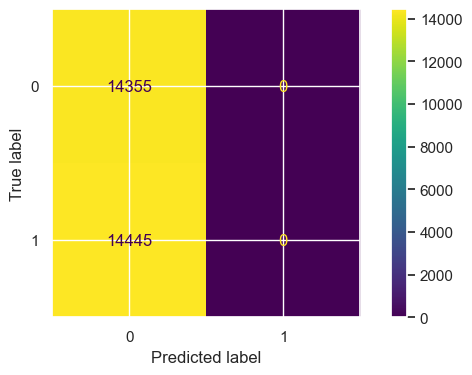

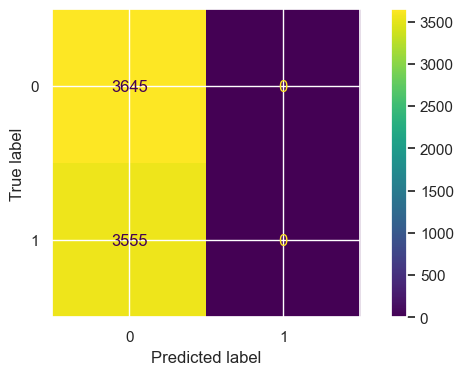

In [34]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***4-RandomForestClassifier***

In [35]:
RFC= RandomForestClassifier()
param_grid = [{
    'n_estimators':[500,1000],
    'min_samples_split':[2,3],
    'max_depth' :[2,6]
}]
grid_search = GridSearchCV(RFC, param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_search.fit(train[:15000],l1[:15000])

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 6], 'min_samples_split': [2, 3],
                          'n_estimators': [500, 1000]}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [36]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for RFC = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 500}
Best estimator = RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=500)
The accuracy for RFC = 0.5129333333333334
precision = 0.5230081514593742
recall = 0.5594936708860759
f1_score = 0.5406360424028268


***The confusion matrix for:***

    1-training set
    2-testing set

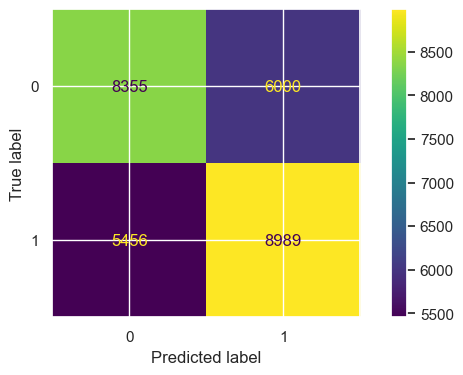

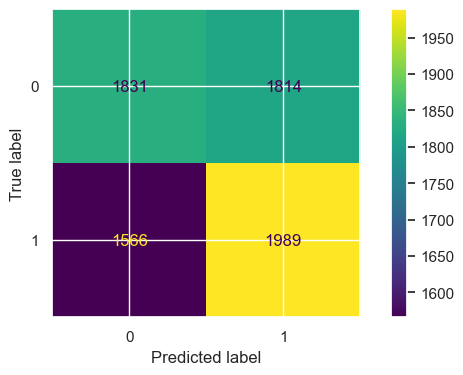

In [37]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***5-KNeighborsClassifier***

In [38]:
knn_clf = KNeighborsClassifier()
param_grid = [{
    'n_neighbors':[3,4,5],
    'weights':['uniform','distance']
}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=3,scoring='accuracy')
grid_search.fit(train,l1)

c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\DELL-G5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [39]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for KNeighborsClassifier = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'n_neighbors': 5, 'weights': 'distance'}
Best estimator = KNeighborsClassifier(weights='distance')
The accuracy for KNeighborsClassifier = 0.5501041666666666
precision = 0.5533184190902312
recall = 0.6261603375527426
f1_score = 0.5874901029295329


***The confusion matrix for:***

    1-training set
    2-testing set

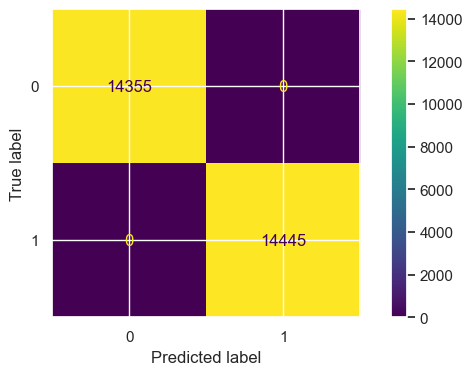

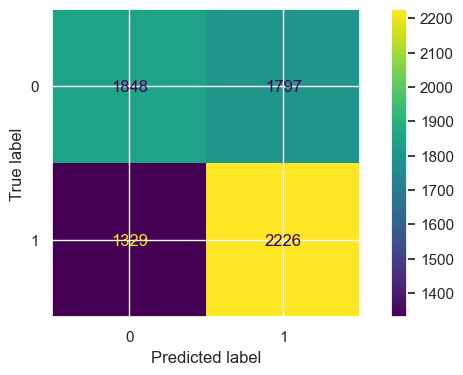

In [40]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***6-MLPClassifier***

In [41]:
mlp_clf = MLPClassifier(max_iter = 2000)
param_grid = [{
    'activation':['identity', 'logistic'],
    'alpha':[0.0001,0.001],
    'learning_rate' :['constant','invscaling']
}]
grid_search = GridSearchCV(mlp_clf, param_grid, cv=3,scoring='accuracy')
grid_search.fit(train,l1)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000),
             param_grid=[{'activation': ['identity', 'logistic'],
                          'alpha': [0.0001, 0.001],
                          'learning_rate': ['constant', 'invscaling']}],
             scoring='accuracy')

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [42]:
P1=grid_search.predict(train)
P2=grid_search.predict(test)
print("Best parameter = "+str(grid_search.best_params_))
print("Best estimator = "+str(grid_search.best_estimator_))
print('The accuracy for MLPClassifier = '+str(grid_search.best_score_))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))


Best parameter = {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'invscaling'}
Best estimator = MLPClassifier(activation='logistic', learning_rate='invscaling', max_iter=2000)
The accuracy for MLPClassifier = 0.5059722222222222
precision = 0.49406307977736547
recall = 0.7490857946554149
f1_score = 0.5954164337618781


***The confusion matrix for:***

    1-training set
    2-testing set

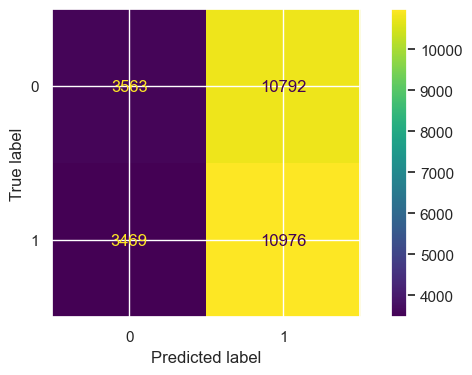

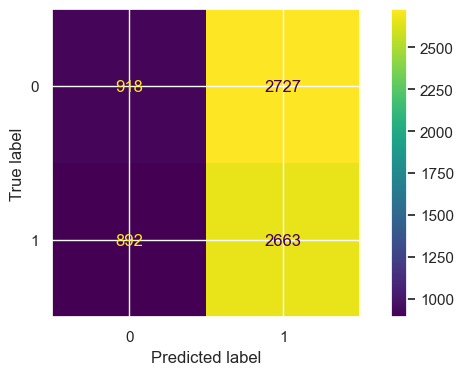

In [43]:
ConfusionMatrixDisplay.from_predictions(l1,P1)
ConfusionMatrixDisplay.from_predictions(l2,P2)
plt.show()

#### ***SGDClassifier used to find the tradeoff between the precision and the recall***

In [47]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train, l1)

SGDClassifier(random_state=42)

***The accuracy, precision, recall, and f1 scores, for the test set :***


In [48]:
P1=cross_val_predict(sgd_clf, train, l1, cv=3)
P2=cross_val_predict(sgd_clf, test, l2, cv=3)

print('The accuracy for SGDClassifier  = '+str(accuracy_score(l2,P2)))
print("precision = "+str(precision_score(l2,P2)))
print("recall = "+str(recall_score(l2,P2)))
print("f1_score = "+str(f1_score(l2,P2)))

The accuracy for SGDClassifier  = 0.4884722222222222
precision = 0.4829151094500801
recall = 0.5088607594936709
f1_score = 0.49554855499246686


In [49]:
l2_scores = cross_val_predict(sgd_clf, test, l2, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(l2, l2_scores)
print("Precisions : ",precisions,"\n\n","Recalls : ", recalls,"\n\n", "Thresholds : ",thresholds)

Precisions :  [0.49375    0.49367968 0.49374826 ... 0.5        0.         1.        ] 

 Recalls :  [1.00000000e+00 9.99718706e-01 9.99718706e-01 ... 2.81293952e-04
 0.00000000e+00 0.00000000e+00] 

 Thresholds :  [-3.47967162 -2.80252796 -2.62449745 ...  2.53324375  2.5524734
  2.77912954]


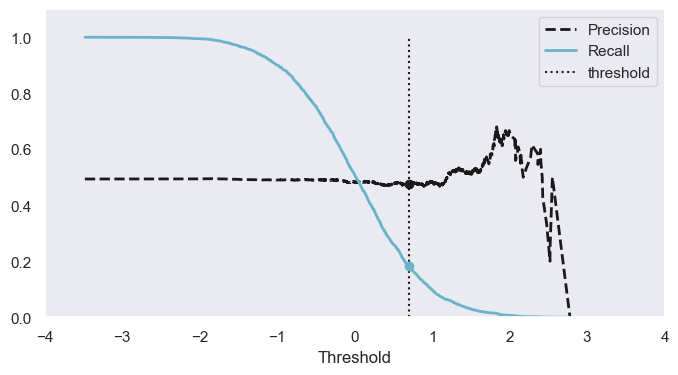

In [50]:
threshold=0.7
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "k--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "c-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "ko")
plt.plot(thresholds[idx], recalls[idx], "co")
plt.axis([-4,4, 0, 1.1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="upper right")

plt.show()

## PART 3

***Neural networks***

*Three models are created in this part, two of which are sequential, and one is functional, as shown in the table below :* 

|***Properties***|***seqModel1***|***seqModel2***|***funcModel***|
|----------|---------|---------|---------|
|**Activation function**|*RelU*|*elU*|*RelU*|
|**Optimizer**|*Adam*|*RMSProp*|*SGD*|
|**Initializer**|*he_uniform*|*he_uniform*|*he_uniform*|
|**Dropout**|*Yes (0.15)*|*Yes (0.15)*|*No*|



### ***Here we split the training set to get validation set which represents 20% of the training set***

In [51]:
x_train= train[:23040]
y_train = l1[:23040]
x_valid= train[23040:]
y_valid = l1[23040:]
x_train.shape


(23040, 16)

### ***seqModel1 :***

In [52]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(16)))

model.add(layers.Dense(400,kernel_initializer="he_normal",activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(layers.Dense(200,kernel_initializer="he_normal",activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(layers.Dense(100,kernel_initializer="he_normal",activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(layers.Dense(50,kernel_initializer="he_normal",activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(layers.Dense(25,kernel_initializer="he_normal",activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(layers.Dense(2,kernel_initializer="he_normal",activation="softmax"))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               6800      
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 batch_normalization (Batch  (None, 400)               1600      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                       

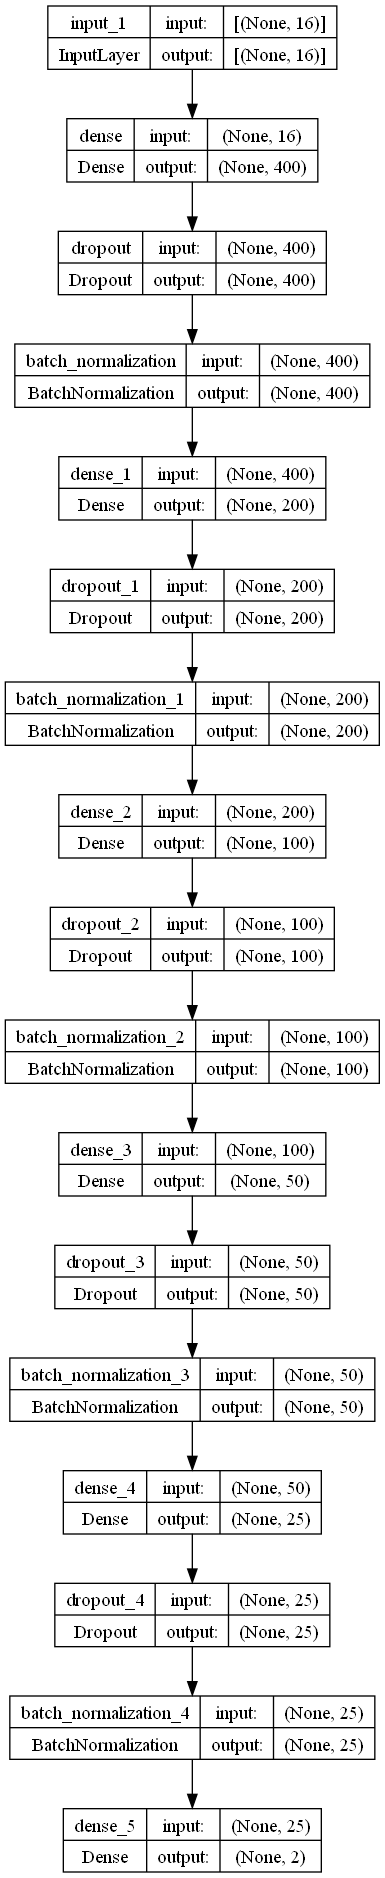

In [54]:
tf.keras.utils.plot_model(model, "medstu_model0.png", show_shapes=True)

In [55]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer , metrics=["accuracy"])

In [56]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=20)
out = model.fit(x_train, y_train, epochs=60, validation_data=(x_valid, y_valid),callbacks=[early_stopping_cb])

Epoch 1/60
720/720 [==============================] - 5s 4ms/step - loss: 0.7435 - accuracy: 0.5016 - val_loss: 0.6972 - val_accuracy: 0.5073
Epoch 2/60
720/720 [==============================] - 3s 4ms/step - loss: 0.6981 - accuracy: 0.5003 - val_loss: 0.6946 - val_accuracy: 0.4990
Epoch 3/60
720/720 [==============================] - 3s 4ms/step - loss: 0.6941 - accuracy: 0.5049 - val_loss: 0.6938 - val_accuracy: 0.5056
Epoch 4/60
720/720 [==============================] - 3s 3ms/step - loss: 0.6938 - accuracy: 0.5056 - val_loss: 0.6949 - val_accuracy: 0.4984
Epoch 5/60
720/720 [==============================] - 3s 4ms/step - loss: 0.6936 - accuracy: 0.5091 - val_loss: 0.6939 - val_accuracy: 0.5009
Epoch 6/60
720/720 [==============================] - 3s 4ms/step - loss: 0.6938 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5095
Epoch 7/60
720/720 [==============================] - 3s 4ms/step - loss: 0.6933 - accuracy: 0.5124 - val_loss: 0.6944 - val_accuracy: 0.5054
Epoch 

In [57]:
out.params

{'verbose': 1, 'epochs': 60, 'steps': 720}

In [58]:
t_loss,t_accuracy=model.evaluate(test, l2)

  1/225 [..............................] - ETA: 3s - loss: 0.7056 - accuracy: 0.5312

225/225 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5168


In [59]:
model.evaluate(test,l2)
X = test[:20]
y_proba = model.predict(X)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)
print("predictions: "+str(y_pred))
x=l2[:20].tolist()
print("labels: "+str(x))

1/1 [==============================] - 0s 173ms/step
predictions: [1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1]
labels: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]


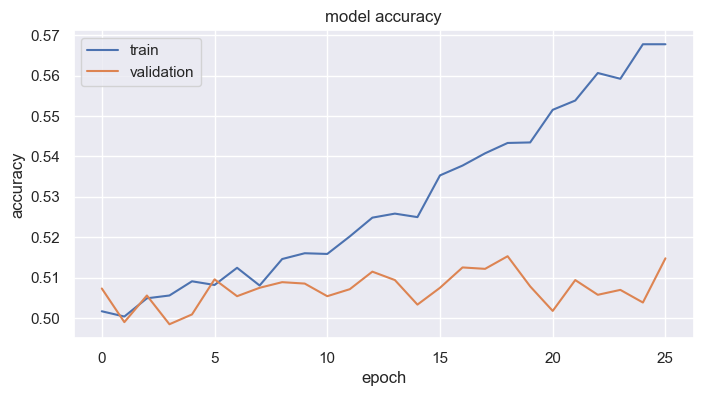

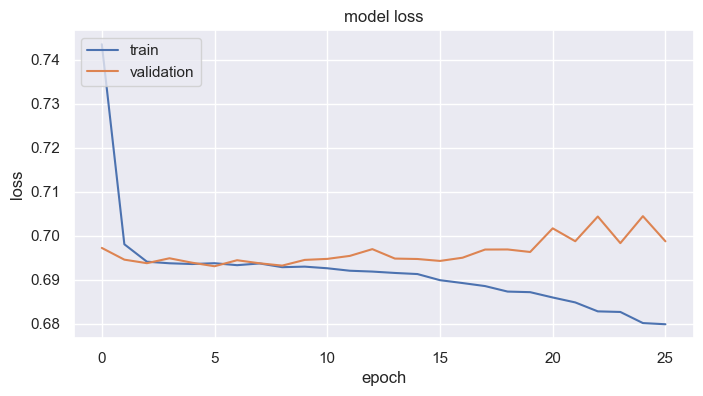

In [60]:
#  "Accuracy"
plt.plot(out.history['accuracy'])
plt.plot(out.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Text(0, 0.5, 'accuracy')

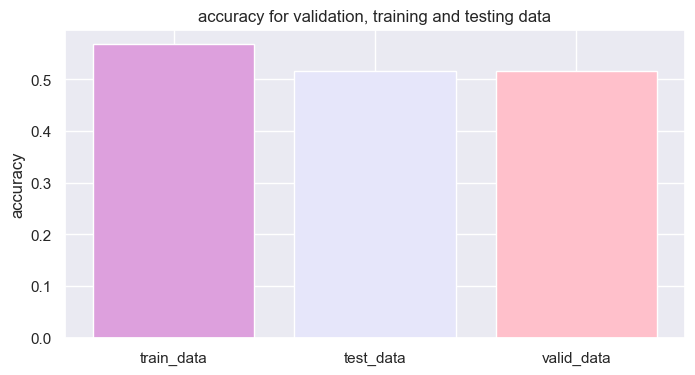

In [61]:
list1=["train_data",'test_data','valid_data']
list2=[max(out.history['accuracy']),t_accuracy,max(out.history['val_accuracy'])]
plt.bar(list1,list2,color=['plum','lavender','pink'])
plt.title('accuracy for validation, training and testing data')
plt.ylabel('accuracy')

### ***seqModel2 :***

In [62]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(16)))

model.add(layers.Dense(400,kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.15))

model.add(layers.Dense(200,kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.15))

model.add(layers.Dense(100,kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.15))

model.add(layers.Dense(50,kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.15))

model.add(layers.Dense(25,kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.15))

model.add(layers.Dense(2,kernel_initializer="he_normal",activation="softmax"))


In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               6800      
                                                                 
 batch_normalization_5 (Bat  (None, 400)               1600      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 400)               0         
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               80200     
                                                                 
 batch_normalization_6 (Bat  (None, 200)               800       
 chNormalization)                                     

In [64]:
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

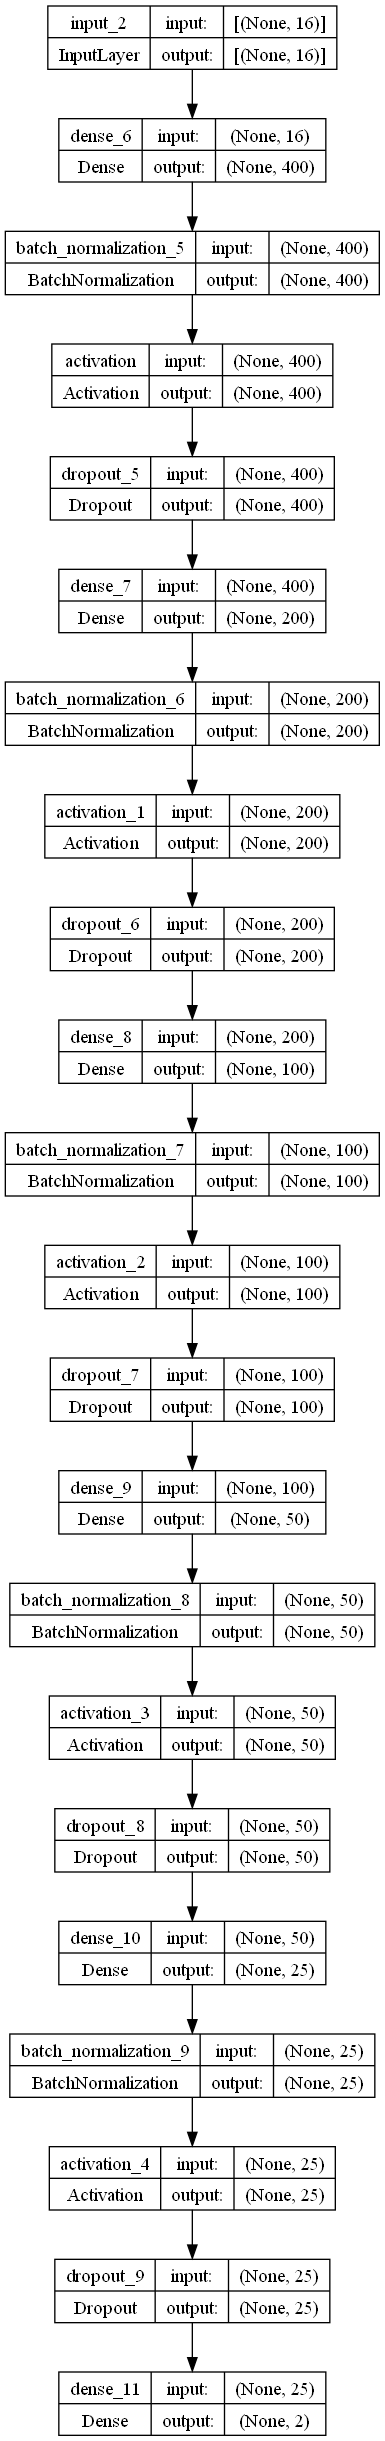

In [65]:
tf.keras.utils.plot_model(model, "medstu_model1.png", show_shapes=True)

In [66]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=20)

out = model.fit(x_train, y_train, epochs=60, validation_data=(x_valid, y_valid),callbacks=[early_stopping_cb])

Epoch 1/60
720/720 [==============================] - 4s 3ms/step - loss: 0.7386 - accuracy: 0.5037 - val_loss: 0.6946 - val_accuracy: 0.5069
Epoch 2/60
720/720 [==============================] - 2s 3ms/step - loss: 0.7053 - accuracy: 0.4995 - val_loss: 0.6983 - val_accuracy: 0.4877
Epoch 3/60
720/720 [==============================] - 2s 3ms/step - loss: 0.6986 - accuracy: 0.4994 - val_loss: 0.6934 - val_accuracy: 0.5028
Epoch 4/60
720/720 [==============================] - 2s 3ms/step - loss: 0.6952 - accuracy: 0.5020 - val_loss: 0.6963 - val_accuracy: 0.4875
Epoch 5/60
720/720 [==============================] - 2s 3ms/step - loss: 0.6942 - accuracy: 0.5038 - val_loss: 0.6937 - val_accuracy: 0.4972
Epoch 6/60
720/720 [==============================] - 3s 3ms/step - loss: 0.6940 - accuracy: 0.5046 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/60
720/720 [==============================] - 2s 3ms/step - loss: 0.6939 - accuracy: 0.5021 - val_loss: 0.6954 - val_accuracy: 0.4938
Epoch 

In [67]:
t_val,t_accuracy=model.evaluate(test, l2)

  1/225 [..............................] - ETA: 3s - loss: 0.6870 - accuracy: 0.5625

225/225 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4942


In [68]:
model.evaluate(test,l2)
X = test[:20]
y_proba = model.predict(X)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)
print("predictions: "+str(y_pred))
x=l2[:20].tolist()
print("labels: "+str(x))

1/1 [==============================] - 0s 285ms/step
predictions: [1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0]
labels: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


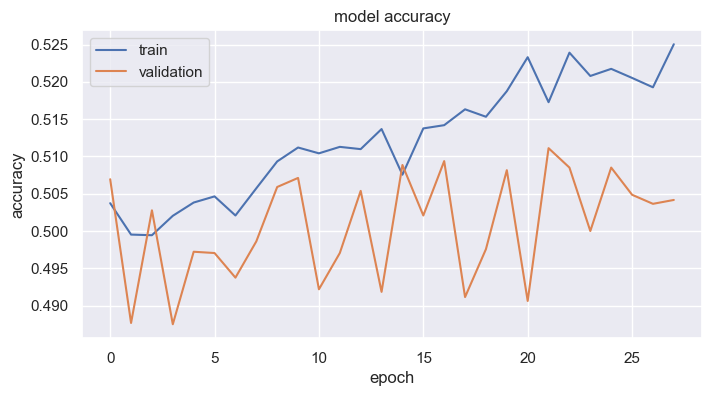

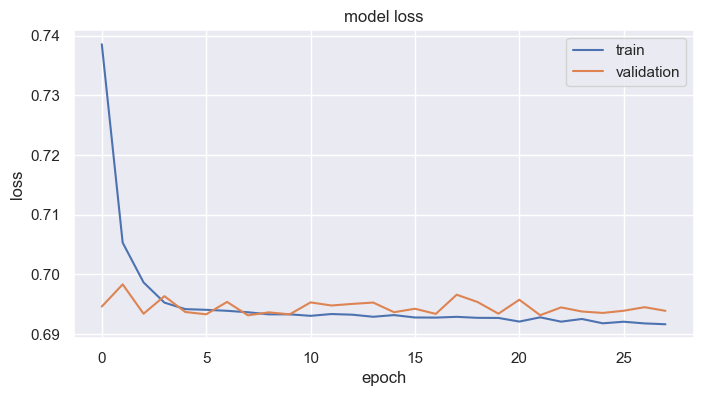

In [69]:
print(out.history.keys())
#  "Accuracy"
plt.plot(out.history['accuracy'])
plt.plot(out.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()
# "Loss"
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

Text(0, 0.5, 'accuracy')

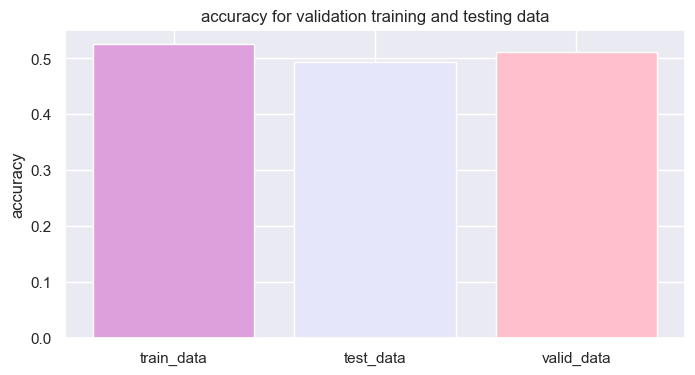

In [70]:
list1=["train_data",'test_data','valid_data']
list2=[max(out.history['accuracy']),t_accuracy,max(out.history['val_accuracy'])]
plt.bar(list1,list2,color=['plum','lavender','pink'])
plt.title('accuracy for validation training and testing data')
plt.ylabel('accuracy')

### ***funcModel :***


In [71]:
L1=layers.Input(shape=[6])
L2=layers.Input(shape=[12])
norm_1 = layers.BatchNormalization()(L1)
hidden1 =layers.Dense(50, activation="relu",kernel_initializer="he_uniform")(norm_1)
norm_2 = layers.BatchNormalization()(hidden1)
hidden2 =layers.Dense(50, activation="relu",kernel_initializer="he_uniform")(norm_2)
norm_3 = layers.BatchNormalization()(hidden2)
norm_4 = layers.BatchNormalization()(L2)
concat =layers.concatenate([norm_4, norm_3])
output1 = keras.layers.Dense(2 , name='Moutput')(concat)
output2 = keras.layers.Dense(2 , name='Aoutput')(norm_3)
model = keras.models.Model(inputs=[L1,L2], outputs=[output1,output2])

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 batch_normalization_10 (Ba  (None, 6)                    24        ['input_3[0][0]']             
 tchNormalization)                                                                                
                                                                                                  
 dense_12 (Dense)            (None, 50)                   350       ['batch_normalization_10[0][0]
                                                                    ']                            
                                                                                              

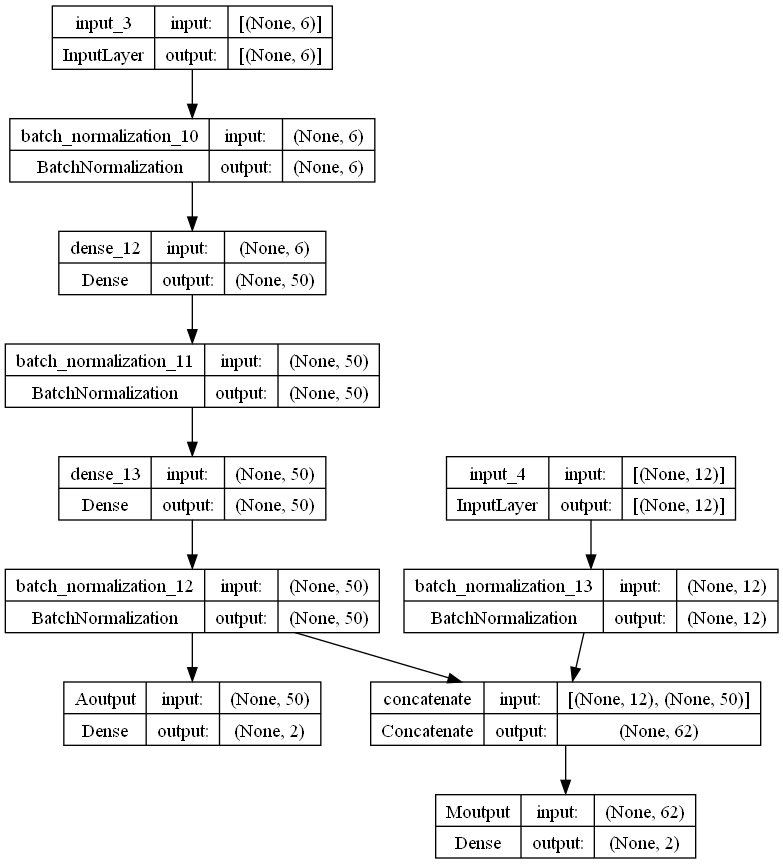

In [73]:
tf.keras.utils.plot_model(model, "medstu_model2.png", show_shapes=True)

In [80]:
model.compile(loss=["binary_crossentropy","binary_crossentropy"], optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [81]:
X_train_A, X_train_B = x_train.iloc[:, :6], x_train.iloc[:, 4:]
X_valid_A, X_valid_B = x_valid.iloc[:, :6], x_valid.iloc[:, 4:]
X_test_A, X_test_B = test.iloc[:, :6], test.iloc[:, 4:]
X_new_A, X_new_B = X_test_A.iloc[:6], X_test_B.iloc[:6]


In [82]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=40,validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/40
720/720 [==============================] - 4s 2ms/step - loss: 1.4019 - Moutput_loss: 0.7005 - Aoutput_loss: 0.7014 - Moutput_accuracy: 0.4941 - Aoutput_accuracy: 0.4986 - val_loss: 1.3967 - val_Moutput_loss: 0.6988 - val_Aoutput_loss: 0.6979 - val_Moutput_accuracy: 0.5059 - val_Aoutput_accuracy: 0.5003
Epoch 2/40
720/720 [==============================] - 1s 2ms/step - loss: 1.4013 - Moutput_loss: 0.7006 - Aoutput_loss: 0.7008 - Moutput_accuracy: 0.4989 - Aoutput_accuracy: 0.5005 - val_loss: 1.3997 - val_Moutput_loss: 0.7001 - val_Aoutput_loss: 0.6995 - val_Moutput_accuracy: 0.5028 - val_Aoutput_accuracy: 0.5007
Epoch 3/40
720/720 [==============================] - 1s 2ms/step - loss: 1.4001 - Moutput_loss: 0.7001 - Aoutput_loss: 0.7000 - Moutput_accuracy: 0.4980 - Aoutput_accuracy: 0.5036 - val_loss: 1.3959 - val_Moutput_loss: 0.6982 - val_Aoutput_loss: 0.6978 - val_Moutput_accuracy: 0.4974 - val_Aoutput_accuracy: 0.5002
Epoch 4/40
720/720 [==============================] 

In [84]:
bce_test = model.evaluate((X_test_A, X_test_B), l2)

225/225 [==============================] - 0s 1ms/step - loss: 1.3878 - Moutput_loss: 0.6941 - Aoutput_loss: 0.6937 - Moutput_accuracy: 0.4988 - Aoutput_accuracy: 0.4943


In [85]:

y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 107ms/step


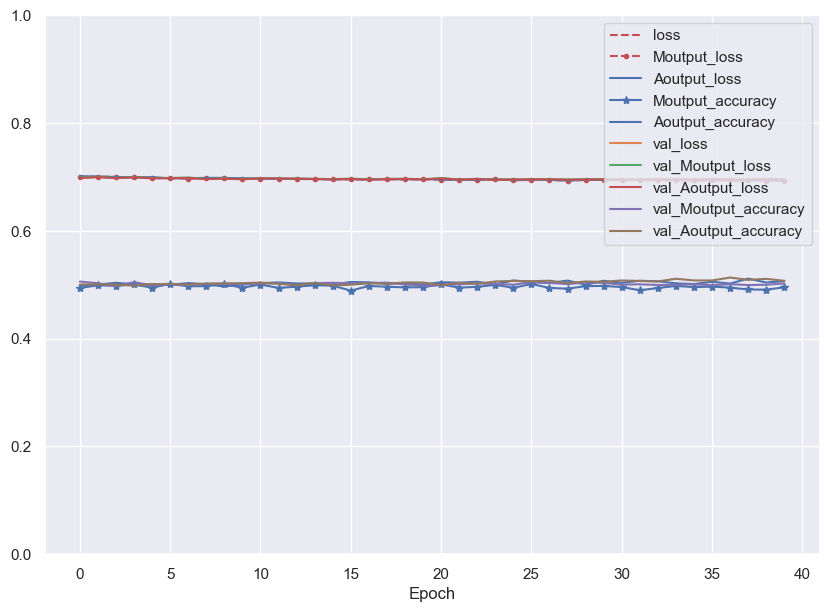

In [86]:
pd.DataFrame(history.history).plot(
    figsize=(10, 7), ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="upper right")
plt.show()